# Machine Learning Engineer Nanodegree
## Capstone Project: Who Tends to Suicide

## Data Preprocessing
### Import Data
load dataset who_suicide_dataset.csv for this project.

In [12]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import math

# Import sklearn.preprocessing.StandardScaler, for normalize
from sklearn.preprocessing import MinMaxScaler

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the who_suicide_dataset to dataFrame
data = pd.read_csv("foreveralone.csv")

n_records = len(data)
print("Total number of records: {}".format(n_records))

label_1_num=len(data[data.attempt_suicide == 'Yes'])
label_0_num=len(data[data.attempt_suicide == 'No'])
print("Total number of records that attempt_suicide = Y: {}".format(label_1_num))
print("Total number of records that attempt_suicide = N: {}".format(label_0_num))

display(data.head(n=5))

Total number of records: 469
Total number of records that attempt_suicide = Y: 85
Total number of records that attempt_suicide = N: 384


,time,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,employment,job_title,edu_level,improve_yourself_how,attempt_suicide
0,5/17/2016 20:04:18,Male,Straight,35,"$30,000 to $39,999",White non-Hispanic,Normal weight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date",Employed for wages,mechanical drafter,Associate degree,None,Yes
1,5/17/2016 20:04:30,Male,Bisexual,21,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date, date...",Out of work and looking for work,-,"Some college, no degree",join clubs/socual clubs/meet ups,No
2,5/17/2016 20:04:58,Male,Straight,22,$0,White non-Hispanic,Overweight,Yes,No,No,10.0,Yes,Yes,I don't want help,Out of work but not currently looking for work,unemployed,"Some college, no degree",Other exercise,No
3,5/17/2016 20:08:01,Male,Straight,19,"$1 to $10,000",White non-Hispanic,Overweight,Yes,Yes,No,8.0,Yes,Yes,date coaching,A student,student,"Some college, no degree",Joined a gym/go to the gym,No
4,5/17/2016 20:08:04,Male,Straight,23,"$30,000 to $39,999",White non-Hispanic,Overweight,No,No,Yes and I have,10.0,No,Yes,I don't want help,Employed for wages,Factory worker,"High school graduate, diploma or the equivalen...",None,No


## Data Exploration

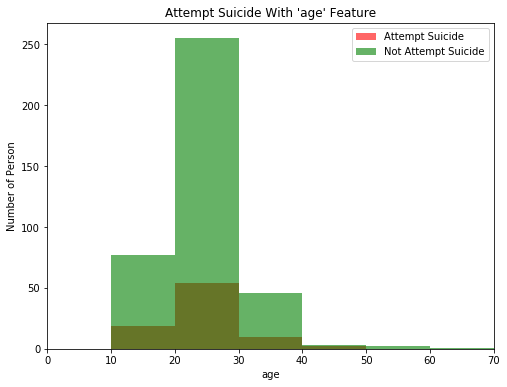

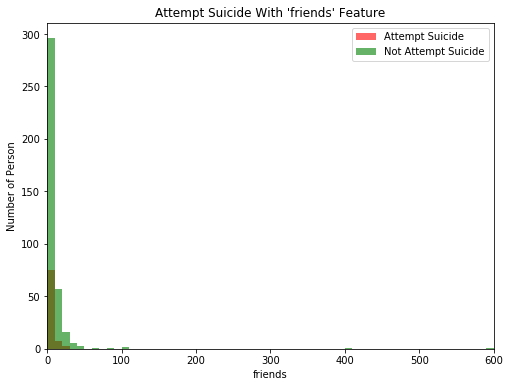

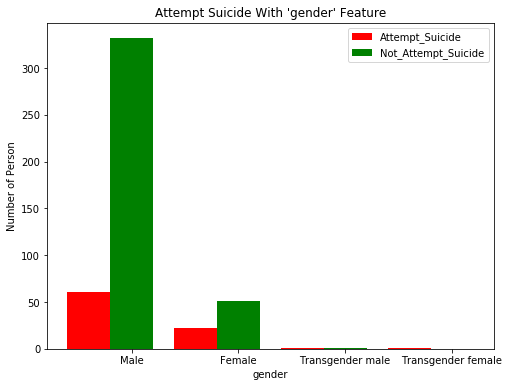

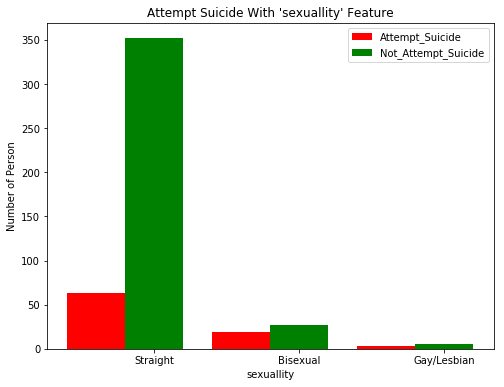

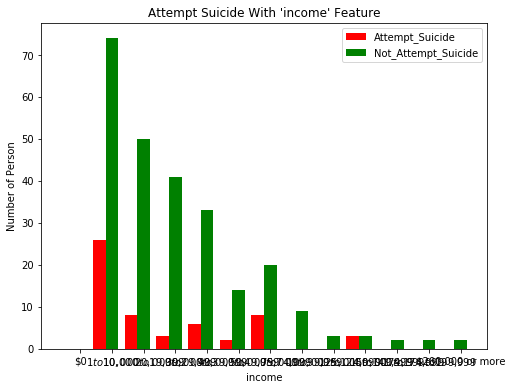

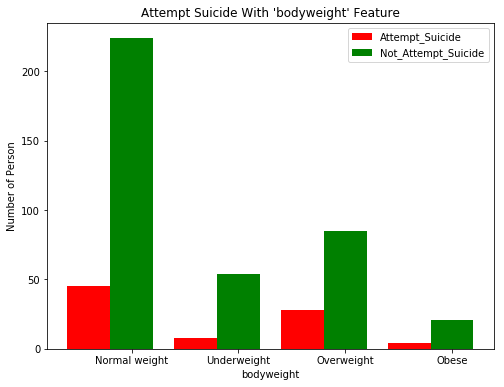

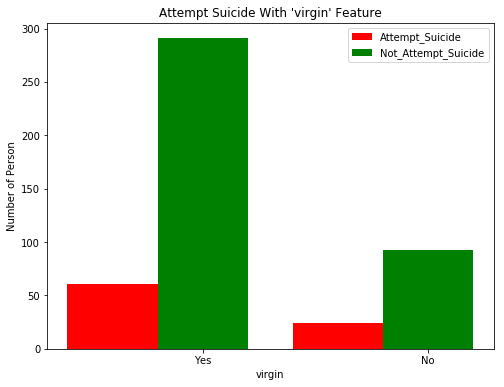

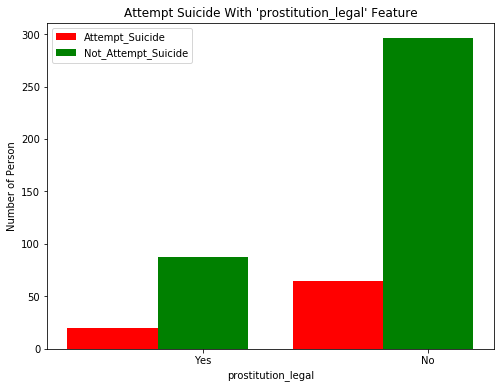

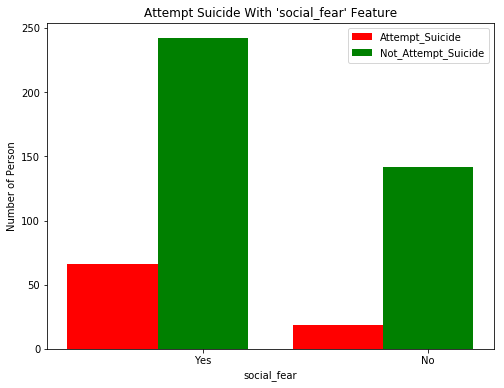

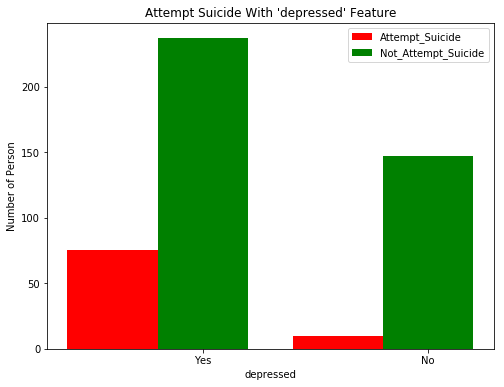

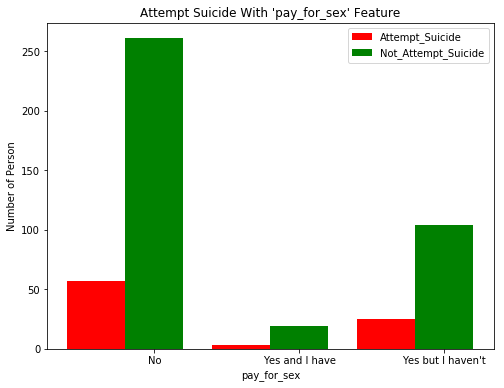

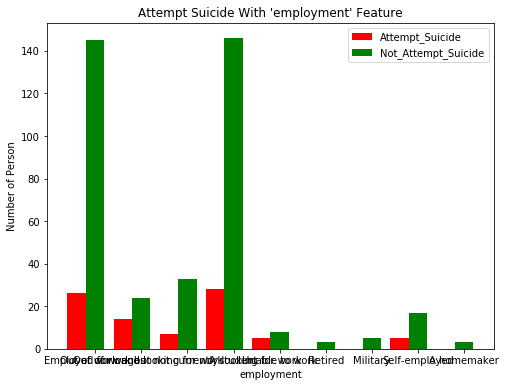

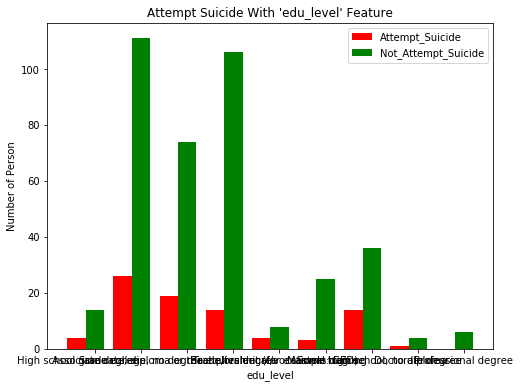

In [14]:
data_outcome = data['attempt_suicide']
data_drop = data.drop(['attempt_suicide'], axis=1)

keys = ['age','friends','gender','sexuallity','income','bodyweight','virgin','prostitution_legal',\
      'social_fear','depressed','pay_for_sex','employment','edu_level']
for key in keys:
    vs.display_hist(data_drop, data_outcome, key)

## Data Preprocessing
1. Drop features:
    * time
    * what_help_from_others
    * improve_yourself_how
    * job_title
    * virgin
    * prostitution_legal
    * pay_for_sex
2. Handle with column 'income'
3. Set 'Yes' to 1, and 'No' to 0 and set string to upper case
4. Transforming skewed continuous features
    * age
    * friends
5. Normalizing numerical features¶
    * age
    * income
    * friends
6. One hot encoding the none numerical features
    * gender
    * sexuallity
    * race
    * bodyweight
    * social_fear
    * depressed
    * employment
    * edu_level

### Drop features

In [15]:
# remove no use features
data = data.drop(['time','what_help_from_others','improve_yourself_how','job_title','virgin','prostitution_legal','pay_for_sex'], axis=1)


In [16]:
# deal with income
# set $0 -> 0
# set average for $1 to $10,000
# set min income for $200,000 or more
def calc_income(row):
    if (row['income'].strip())=='$0':
        return float(0)
    elif 'to' in row['income']:
        splits = row['income'].split('to')
        min_income = splits[0].strip().replace('$','').replace(',','')
        max_income = splits[1].strip().replace('$','').replace(',','')
        return float((int(min_income)+int(max_income))/2)
    elif 'or' in row['income']:
        splits = row['income'].split('or')
        min_income = splits[0].strip().replace('$','').replace(',','')
        max_income = splits[1].strip().replace('$','').replace(',','')
        if min_income.isdigit():
            return float(min_income)
        elif max_income.isdigit():
            return float(max_income)

data['income']=data.apply(calc_income, axis=1)
#display(data.head(n=5))

In [17]:
# set Yes = 1, No = 0
data['social_fear']=data.apply(lambda x: 1 if x['social_fear']=='Yes' else 0, axis=1)
data['depressed']=data.apply(lambda x: 1 if x['depressed']=='Yes' else 0, axis=1)
data['attempt_suicide']=data.apply(lambda x: 1 if x['attempt_suicide']=='Yes' else 0, axis=1)

# features content to uppercase
data['gender']=data.apply(lambda x: x['gender'].upper(), axis=1)
data['race']=data.apply(lambda x: x['race'].upper(), axis=1)
data['sexuallity']=data.apply(lambda x: x['sexuallity'].upper(), axis=1)
data['bodyweight']=data.apply(lambda x: x['bodyweight'].upper(), axis=1)
data['employment']=data.apply(lambda x: x['employment'].upper(), axis=1)
data['edu_level']=data.apply(lambda x: x['edu_level'].upper(), axis=1)

display(data.head(n=5))

data_label = data['attempt_suicide']
data_features = data.drop(['attempt_suicide'],axis=1)

,gender,sexuallity,age,income,race,bodyweight,friends,social_fear,depressed,employment,edu_level,attempt_suicide
0,MALE,STRAIGHT,35,34999.5,WHITE NON-HISPANIC,NORMAL WEIGHT,0.0,1,1,EMPLOYED FOR WAGES,ASSOCIATE DEGREE,1
1,MALE,BISEXUAL,21,5000.5,WHITE NON-HISPANIC,UNDERWEIGHT,0.0,1,1,OUT OF WORK AND LOOKING FOR WORK,"SOME COLLEGE, NO DEGREE",0
2,MALE,STRAIGHT,22,0.0,WHITE NON-HISPANIC,OVERWEIGHT,10.0,1,1,OUT OF WORK BUT NOT CURRENTLY LOOKING FOR WORK,"SOME COLLEGE, NO DEGREE",0
3,MALE,STRAIGHT,19,5000.5,WHITE NON-HISPANIC,OVERWEIGHT,8.0,1,1,A STUDENT,"SOME COLLEGE, NO DEGREE",0
4,MALE,STRAIGHT,23,34999.5,WHITE NON-HISPANIC,OVERWEIGHT,10.0,0,1,EMPLOYED FOR WAGES,"HIGH SCHOOL GRADUATE, DIPLOMA OR THE EQUIVALEN...",0


### Transforming Skewed Continuous Features

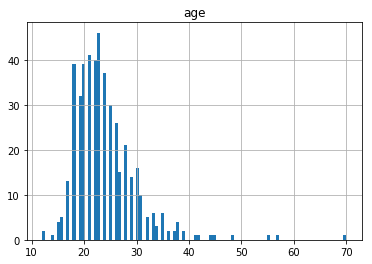

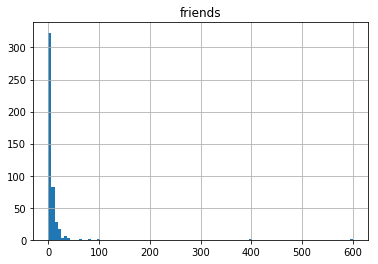

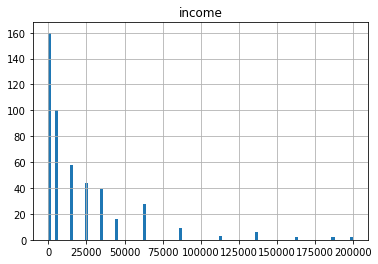

In [18]:
# Visualize skewed continuous features of original data
hist = data_features.hist(column='age',bins=100)
hist = data_features.hist(column='friends', bins=100)
hist = data_features.hist(column='income', bins=100)

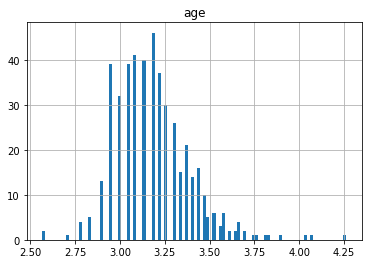

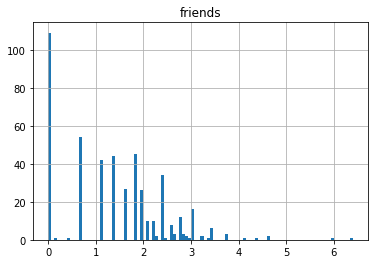

In [19]:
# Visualize skewed continuous features of original data
# Log-transform the skewed features: age, income, friends
skewed = ['age','friends']
data_log_trans = pd.DataFrame(data = data_features)
data_log_trans[skewed] = data_features[skewed].apply(lambda x: np.log(x + 1))

hist = data_log_trans.hist(column='age',bins=100)
hist = data_log_trans.hist(column='friends',bins=100)

### Normalizing Numerical Features

In [20]:
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'income', 'friends']

data_log_trans[numerical] = scaler.fit_transform(data_log_trans[numerical])

# Show an example of a record with scaling applied
#display(data_log_trans.head(n = 5))

### One Hot Encoding

In [21]:
# one hot encoding: gender, sexuallity, race, ,bodyweight, pay_for_sex
data_one_hot_encode = pd.get_dummies(data_log_trans)
display(data_one_hot_encode.head(n=10))

# Print the number of features after one-hot encoding
encoded = list(data_one_hot_encode.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

,age,income,friends,social_fear,depressed,gender_FEMALE,gender_MALE,gender_TRANSGENDER FEMALE,gender_TRANSGENDER MALE,sexuallity_BISEXUAL,...,employment_UNABLE TO WORK,edu_level_ASSOCIATE DEGREE,edu_level_BACHELORS DEGREE,edu_level_DOCTORATE DEGREE,"edu_level_HIGH SCHOOL GRADUATE, DIPLOMA OR THE EQUIVALENT (FOR EXAMPLE: GED)",edu_level_MASTERS DEGREE,edu_level_PROFESSIONAL DEGREE,"edu_level_SOME COLLEGE, NO DEGREE","edu_level_SOME HIGH SCHOOL, NO DIPLOMA",edu_level_TRADE/TECHNICAL/VOCATIONAL TRAINING
0,0.599960,0.174998,0.000000,1,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0.309880,0.025003,0.000000,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.336063,0.000000,0.374753,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.253740,0.025003,0.343392,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.361132,0.174998,0.374753,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0.385177,0.312498,0.171696,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,0.336063,0.025003,0.171696,1,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,0.385177,0.124998,0.374753,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0.282479,0.074998,0.000000,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0.566292,0.312498,0.304115,1,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


57 total features after one-hot encoding.


## Start to Learning
### Shuffle and Split Data
Split dataset into 80% for training data and 20% for testing data. 

In [22]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

#data_label, data_features
index_0 = []
index_1 = []
for index, x in enumerate(data_label):
    if x == 1:
        index_1.append(index)
    else:
        index_0.append(index)

#print("index for label 0: {}".format(index_0))
#print("index for label 1: {}".format(index_1))

data_label_0 = data_label[index_0]
data_label_1 = data_label[index_1]

data_one_hot_encode_0 = data_one_hot_encode.loc[index_0]
data_one_hot_encode_1 = data_one_hot_encode.loc[index_1]

#display(data_one_hot_encode_1.head(n=90))

X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(data_one_hot_encode_0, 
                                                    data_label_0, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(data_one_hot_encode_1, 
                                                    data_label_1, 
                                                    test_size = 0.2, 
                                                 random_state = 42)

X_train = X_train_0.append(X_train_1)
X_test = X_test_0.append(X_test_1)
y_train = y_train_0.append(y_train_1)
y_test = y_test_0.append(y_test_1)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 375 samples.
Testing set has 94 samples.


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Implement Benchmark Model
The benchmark model is Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import roc_auc_score

clf_logistic_regression = LogisticRegression(random_state=42, solver='lbfgs',max_iter=100)
clf_logistic_regression = clf_logistic_regression.fit(X_train, y_train)
predict_logistic_regression = clf_logistic_regression.predict(X_test)

print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predict_logistic_regression)))
print("F-score on the testing data: {:.4f}".format(fbeta_score(y_test, predict_logistic_regression, beta = 0.5)))
print("AUC score on the testing data: {:.4f}".format(roc_auc_score(y_test, predict_logistic_regression)))

'''
Accuracy score on testing data: 0.8191
F-score on the testing data: 0.2000
AUC score on the testing data: 0.5229
'''

Accuracy score on testing data: 0.8191
F-score on the testing data: 0.2000
AUC score on the testing data: 0.5229


'\nAccuracy score on testing data: 0.8191\nF-score on the testing data: 0.2000\nAUC score on the testing data: 0.5229\n'

## Implement Supervised Models
### Decision Trees

In [66]:
from sklearn.tree import DecisionTreeClassifier
results = {}

clf_decision_tree = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=5, max_features=0.9)
clf_decision_tree = clf_decision_tree.fit(X_train, y_train)
predict_decision_tree = clf_decision_tree.predict(X_test)

print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predict_decision_tree)))
print("F-score on the testing data: {:.4f}".format(fbeta_score(y_test, predict_decision_tree, beta = 0.5)))
print("AUC score on the testing data: {:.4f}".format(roc_auc_score(y_test, predict_decision_tree)))

'''
max_features=0.9
Accuracy score on testing data: 0.8404
F-score on the testing data: 0.4545
AUC score on the testing data: 0.5817
'''

Accuracy score on testing data: 0.8404
F-score on the testing data: 0.4545
AUC score on the testing data: 0.5817


'\nmax_features=0.9\nAccuracy score on testing data: 0.8404\nF-score on the testing data: 0.4545\nAUC score on the testing data: 0.5817\n'

### AdaBoost

In [43]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import roc_auc_score

clf_adaboost = AdaBoostClassifier(random_state=42,n_estimators=80)
clf_adaboost = clf_adaboost.fit(X_train, y_train)
predict_adaboost = clf_adaboost.predict(X_test)

print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predict_adaboost)))
print("F-score on the testing data: {:.4f}".format(fbeta_score(y_test, predict_adaboost, beta = 0.5)))
print("AUC score on the testing data: {:.4f}".format(roc_auc_score(y_test, predict_adaboost)))

'''
Accuracy score on testing data: 0.8298
F-score on the testing data: 0.4717
AUC score on the testing data: 0.6211
'''

Accuracy score on testing data: 0.8298
F-score on the testing data: 0.4717
AUC score on the testing data: 0.6211


'\nAccuracy score on testing data: 0.8298\nF-score on the testing data: 0.4717\nAUC score on the testing data: 0.6211\n'

### SVM

In [129]:
from sklearn.svm import SVC

#clf_svm = SVC(random_state=42,kernel='poly', gamma=5.0, coef0=2.0, max_iter=700)
clf_svm = SVC(random_state=42,kernel='poly', gamma=4.5, coef0=2.0, max_iter=750)
clf_svm = clf_svm.fit(X_train, y_train) 

predict_svm = clf_svm.predict(X_test)

print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predict_svm)))
print("F-score on the testing data: {:.4f}".format(fbeta_score(y_test, predict_svm, beta = 0.5)))
print("AUC score on the testing data: {:.4f}".format(roc_auc_score(y_test, predict_svm)))

'''
Accuracy score on testing data: 0.7979
F-score on the testing data: 0.4110
AUC score on the testing data: 0.6245
'''

Accuracy score on testing data: 0.7660
F-score on the testing data: 0.3247
AUC score on the testing data: 0.5821


'\nAccuracy score on testing data: 0.7979\nF-score on the testing data: 0.4110\nAUC score on the testing data: 0.6245\n'

### Random Forest Classifier

In [132]:
from sklearn.ensemble import RandomForestClassifier

clf_randomForest = RandomForestClassifier(random_state=42,n_estimators=20,max_features=20)
#clf_randomForest = RandomForestClassifier(random_state=42)
                                          
clf_randomForest = clf_randomForest.fit(X_train, y_train)

predict_randomForest = clf_randomForest.predict(X_test)

print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predict_randomForest)))
print("F-score on the testing data: {:.4f}".format(fbeta_score(y_test, predict_randomForest, beta = 0.5)))
print("AUC score on the testing data: {:.4f}".format(roc_auc_score(y_test, predict_randomForest)))

'''
Accuracy score on testing data: 0.8511
F-score on the testing data: 0.5172
AUC score on the testing data: 0.5882
'''

Accuracy score on testing data: 0.8511
F-score on the testing data: 0.5172
AUC score on the testing data: 0.5882


'\nAccuracy score on testing data: 0.8511\nF-score on the testing data: 0.5172\nAUC score on the testing data: 0.5882\n'

## Model Tuning
Select Adaboost

In [133]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

clf_final = AdaBoostClassifier(random_state=42,n_estimators=80)

parameters = {'n_estimators':[10, 50, 80, 100, 150, 200, 500],'learning_rate':[0.1, 0.5, 1.0, 2.0, 5.0],'algorithm':['SAMME','SAMME.R']}
scorer = make_scorer(roc_auc_score)
grid_obj = GridSearchCV(clf_final, parameters, scoring=scorer)
grid_fit = grid_obj.fit(X_train, y_train)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\ensemble\weight_boosting.py:164: RuntimeWarning: invalid value encountered in divide
  sample_weight /= sample_weight_sum
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\ensemble\weight_boosting.py:578: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\ensemble\weight_boosting.py:603: RuntimeWarning: invalid value encountered in greater
  return self.classes_.take(pred > 0, axis=0)


In [134]:
best_clf = grid_fit.best_estimator_
best_predictions = best_clf.predict(X_test)

print(grid_fit.best_estimator_)

print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("AUC score on the testing data: {:.4f}".format(roc_auc_score(y_test, best_predictions)))

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=42)
Accuracy score on testing data: 0.8191
F-score on the testing data: 0.4082
AUC score on the testing data: 0.5917


## Model Evaluation and Validation

### Learning curve of each n_estimators

n_estimators=50


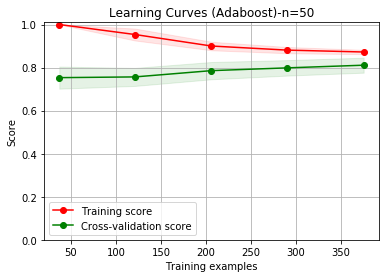

n_estimators=80


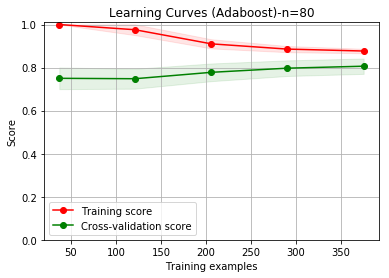

n_estimators=150


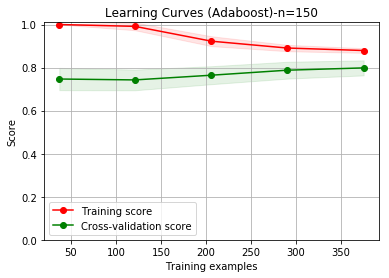

n_estimators=250


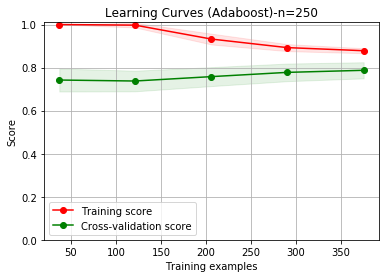

n_estimators=300


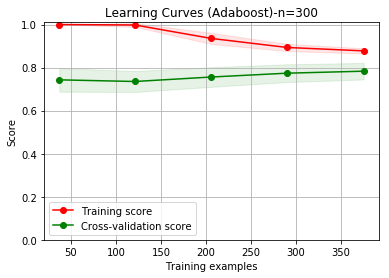

In [38]:
import importlib
importlib.reload(visuals)

from sklearn.ensemble import AdaBoostClassifier
import visuals as vs

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

for k, value in enumerate([50,80,150,250,300]):
    title = "Learning Curves (Adaboost)-n="+str(value)
    estimator = AdaBoostClassifier(n_estimators = value)
    plt = vs.plot_learning_curve(estimator, title, data_one_hot_encode, data_label, ylim=(0.0, 1.01), cv=cv, n_jobs=4, train_sizes=np.linspace(0.1, 1.0, 5))
    print("n_estimators={}".format(value))
    plt.show()